# Tutorial 05: 3D Radon-Cumulative Distribution Transform (3D R-CDT)

This tutorial will demonstrate: how to use the forward and inverse operations of the 3D R-CDT in the *PyTransKit* package.

# Class:: RadonCDT3D
Parameters:
--------------
        Npoints : scaler, number of radon projections (default = 1024)
        use_gpu : boolean, use GPU if True (default = False)

Functions:
--------------
1. Forward transform:
        sig1_hat = forward(x0_range, sig0, x1_range, sig1)
        
        Inputs:
        ----------------
        x0_range : 1x2 array
            contains lower and upper limits for independent variable of reference signal (sig0). Example: [0,1].
        sig0 : 3d array, shape (L, L, L)
            Reference signal.
        x1_range : 1x2 array
            contains lower and upper limits for independent variable of input signal (sig1). Example: [0,1].
        sig1 : 3d array, shape (L, L, L)
            Signal to transform.
            
        Outputs:
        ----------------
        sig1_hat : 2d array, shape(L, Npoints)
            R-CDT of 3D input signal sig1.
  
2. Inverse transform:
        sig1_recon = inverse(sig1_hat, sig0, x1_range)
        
        Inputs:
        ----------------
        sig1_hat : 2d array, shape(L, Npoints)
            R-CDT of 3D signal sig1.
        sig0 : 3d array, shape (L, L, L)
            Reference signal.
        x1_range : 1x2 array
            contains lower and upper limits for independent variable of input signal (sig1). Example: [0,1].
    
        Outputs:
        ----------------
        sig1_recon : 3d array, shape (L, L, L)
            Reconstructed signal.
    

# Example
The example will cover the following operations:
* Forward and inverse operations of the 3D R-CDT

In [1]:
import sys
sys.path.append('../')
from pytranskit.optrans.continuous.radoncdt3D import RadonCDT3D

import time
import numpy as np
from scipy.io import loadmat
import matplotlib.pyplot as plt
%matplotlib inline

### Forward 3D Radon-CDT

Load 3D phantom data from 'images/' direcotry

In [2]:
datafile = 'images/phantom3D.mat'
img3D = loadmat(datafile)['phantom3D']
i03D = np.ones(img3D.shape)

Run forward 3D R-CDT on the 3D phantom data

In [3]:
use_gpu = False  # Set it True if want GPU support
x0_range = [0,1]
x_range = [0,1]
Npoints = 1000

# Create an instance of 3D R-CDT
rcdt3D = RadonCDT3D(Npoints, use_gpu)

tic=time.time()
# Forward function
img3Dhat=rcdt3D.forward(x0_range, i03D/np.sum(img3D), x_range, img3D/np.sum(img3D), rm_edge=False)

toc=time.time()
Run_time = toc - tic
print("Forward 3D RCDT is done in {} seconds".format(Run_time))

Forward 3D RCDT is done in 19.521667003631592 seconds


### Inverse 3D Radon-CDT

In [4]:
tic=time.time()
# Inverse function
img3D_recon = rcdt3D.inverse(img3Dhat, i03D, x_range)
toc=time.time()
Run_time = toc - tic
print("Inverse 3D RCDT is done in {} seconds".format(Run_time))

Inverse 3D RCDT is done in 20.94904351234436 seconds


### Show results

Show specific slices from the input 3D phantom image and reconstructed image

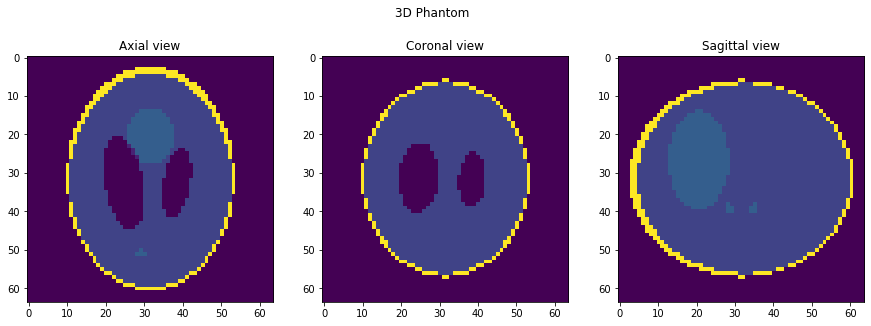

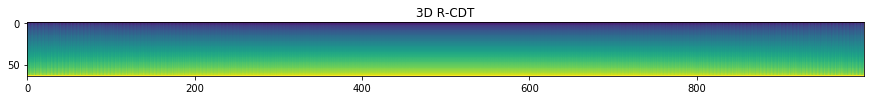

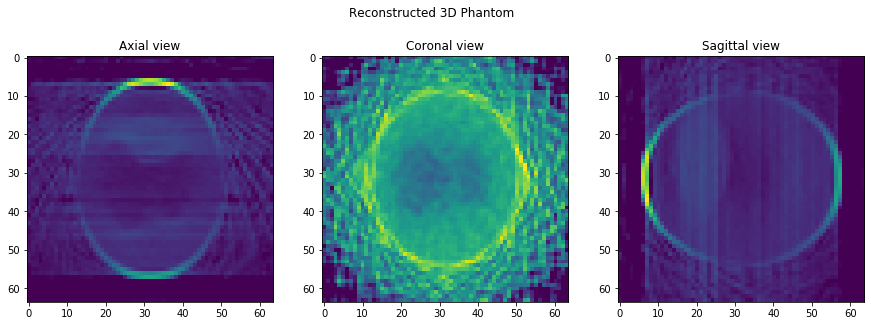

In [5]:
sliceSel = int(0.5*img3D.shape[0])
    
# plot original 3D image
plt.figure(figsize=(15,5)) 
plt.suptitle('3D Phantom')
plt.subplot(131)
plt.imshow(img3D[sliceSel,:,:])
plt.title('Axial view')
    
plt.subplot(132)
plt.imshow(img3D[:,sliceSel,:])
plt.title('Coronal view')
    
plt.subplot(133)
plt.imshow(img3D[:,:,sliceSel])
plt.title('Sagittal view')
plt.show()

# plot 3D Radon transform
fig=plt.figure(figsize=(15,5))
plt.imshow(img3Dhat)
plt.title('3D R-CDT')
plt.show()

# plot 3D reconstruction
plt.figure(figsize=(15,5)) 
plt.suptitle('Reconstructed 3D Phantom')
plt.subplot(131)
plt.imshow(np.log10(.1+img3D_recon[sliceSel,:,:]))
plt.title('Axial view')

plt.subplot(132)
plt.imshow(np.log10(.1+img3D_recon[:,sliceSel,:]))
plt.title('Coronal view')

plt.subplot(133)
plt.imshow(np.log10(.1+img3D_recon[:,:,sliceSel]))
plt.title('Sagittal view')
plt.show()